In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.io import loadmat
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
data = loadmat('data/ex4data1.mat')
weight = loadmat('data/ex4weights.mat')

In [3]:
X = np.c_[np.ones(data['X'].shape[0]), data['X']]
y = data['y'].ravel()

In [4]:
m, n = X.shape

In [5]:
dims = 10
samples = X[:, 1:][np.random.randint(m, size = dims * dims)]

In [6]:
sns.set_style("dark")

In [7]:
def display_data(samples):
    fig = plt.figure(figsize=(5, 5))
    gs = gridspec.GridSpec(10, 10)
    gs.update(bottom = 0.01, top = 0.99, left = 0.01, right = 0.99, wspace = 0.05, hspace = 0.05)

    k = 0

    for i in range(10):
        for j in range(10):
            ax = plt.subplot(gs[i, j])
            ax.axis('off')
            ax.imshow(samples[k].reshape(int(np.sqrt(n)), int(np.sqrt(n))).T, cmap = plt.get_cmap('Greys'), interpolation = 'nearest')
            k += 1

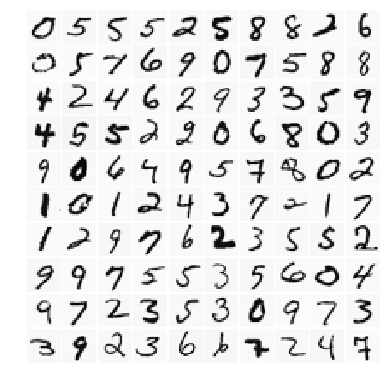

In [8]:
display_data(samples)

In [9]:
theta1, theta2 = weight['Theta1'], weight['Theta2']

In [10]:
sigmoid = lambda z: (1/ (1 + np.exp(-z)))

In [11]:
sigmoid_gradient = lambda z: sigmoid(z) * (1 - sigmoid(z))

In [12]:
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10

In [13]:
theta2 = np.roll(theta2, 1, axis=0)

In [14]:
nn_params = np.concatenate([theta1.ravel(), theta2.ravel()])

In [15]:
nn_params.shape

(10285,)

In [19]:
def nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lmda=0.0):
#     import pdb; pdb.set_trace()
    theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], 
                        (hidden_layer_size, (input_layer_size + 1)))
    theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):], 
                       (num_labels, (hidden_layer_size + 1)))
    m, n = X.shape
    
    J = 0
    theta1_grad = np.zeros(theta1.shape)
    theta2_grad = np.zeros(theta2.shape)
    
    a1 = X
    z2 = a1.dot(theta1.T)
    a2 = sigmoid(z2)
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis = 1)
    
    z3 = a2.dot(theta2.T)
    a3 = sigmoid(z3)
    import pdb; pdb.set_trace()
#     y_matrix = y.reshape(-1)
#     y_matrix = np.eye(num_labels)[y_matrix]
    
    temp1 = theta1
    temp2 = theta2
    
    reg_term = (lmda / (2 * m)) * (np.sum(np.square(temp1[:, 1:])) + np.sum(np.square(temp2[:, 1:])))
    
    J = (-1/m) * np.sum((y.dot(np.log(a3))) + (1- y).dot(np.log(1 - a3))) + reg_term
    
    return J

In [18]:
hidden_layer_size

25

In [20]:
lmda = 0
print(nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lmda))

> <ipython-input-19-a8751edd5cbd>(24)nn_cost_function()
-> temp1 = theta1


(Pdb)  c


1109.3899911280976
